<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-09/blob/main/hw_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Завантаження даних
data_2d = pd.read_csv("goit-ds-hw-09/data/data_2d.csv")
data_mnist = pd.read_csv("goit-ds-hw-09/data/mnist.csv")

print("Форма 2D датасету:", data_2d.shape)
print("Форма MNIST датасету:", data_mnist.shape)


Форма 2D датасету: (199, 3)
Форма MNIST датасету: (499, 785)


In [ ]:
# =========================
# ФУНКЦІЯ ЛІКТЬОВОГО МЕТОДУ
# =========================
def elbow_method(data, max_k=10, title="Elbow Method"):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel("Кількість кластерів (k)")
    plt.ylabel("Inertia (SSE)")
    plt.title(title)
    plt.show()


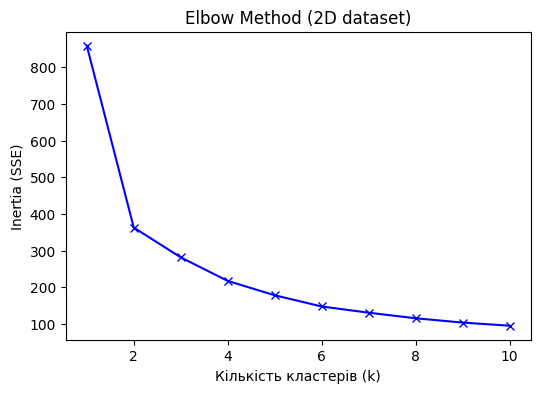

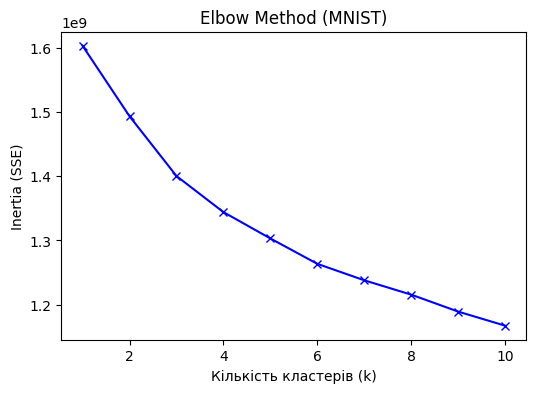

In [ ]:
# =========================
# Завдання 1. Ліктьовий метод
# =========================

# Для 2D датасету
elbow_method(data_2d, max_k=10, title="Elbow Method (2D dataset)")

# Для MNIST (візьмемо підмножину, щоб швидше рахувалось)
n_samples = min(2000, len(data_mnist))  # щоб не перевищити розмір датасету
elbow_method(data_mnist.sample(n_samples, random_state=42), max_k=10, title="Elbow Method (MNIST)")



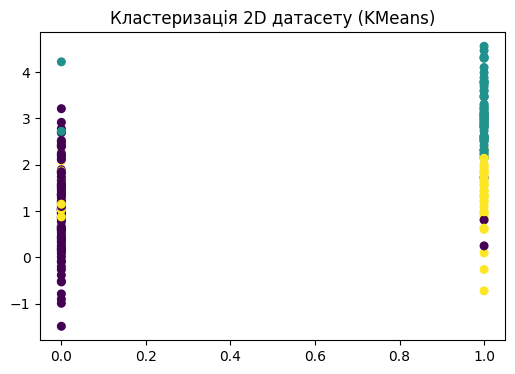

In [ ]:
# =========================
# Завдання 2. Візуалізація
# =========================

# --- 2D dataset ---
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
data_2d["cluster"] = kmeans_2d.fit_predict(data_2d)

plt.figure(figsize=(6, 4))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=data_2d["cluster"], cmap="viridis", s=30)
plt.title("Кластеризація 2D датасету (KMeans)")
plt.show()


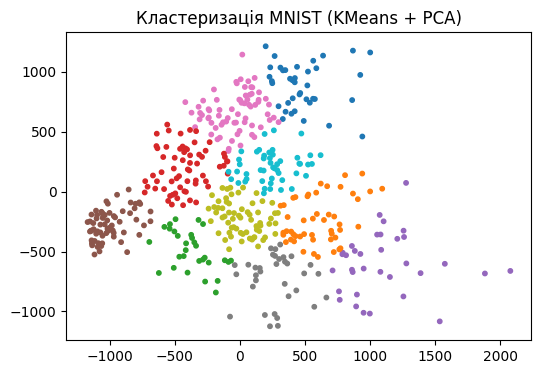

In [ ]:
# --- MNIST dataset ---
# PCA до 2 вимірів
pca = PCA(n_components=2, random_state=42)
mnist_pca = pca.fit_transform(data_mnist)

# Кластеризація
kmeans_mnist = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters_mnist = kmeans_mnist.fit_predict(mnist_pca)

plt.figure(figsize=(6, 4))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=clusters_mnist, cmap="tab10", s=10)
plt.title("Кластеризація MNIST (KMeans + PCA)")
plt.show()
